<a href="https://colab.research.google.com/github/das9souvik/Black-Pearl/blob/main/Analytics_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multi-Label Image Classification on Movies Poster using CNN**

We are trying to identify the genre of movies from their posters using Deep Learning methods 

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

**Cloning the Datasets from GitHub link**

In [2]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [3]:
Metadata=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [4]:
Metadata.shape

(7254, 27)

In [5]:
Metadata.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Converting each image to a fixed size of 350×350. The values in the images are between 0 to 255. Neural networks work well with values between 0 to 1. Normalizing the values by dividing all of the values by 255.**

In [6]:
image_height=350
image_width=350
x=[]
for i in tqdm(range(Metadata.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + Metadata['Id'][i] + '.jpg'
  img= image.load_img(path, target_size=(image_height, image_width, 3))
  img=image.img_to_array(img)
  img= img/255.0
  x.append(img)
 
x=np.array(x)

100%|██████████| 7254/7254 [00:30<00:00, 234.94it/s]


**x is a numpy array which has 7254 images. Each image has the size 350×350 and is 3 dimensional as the image is a RGB coloured image.**

In [7]:
x.shape

(7254, 350, 350, 3)

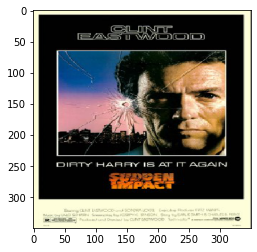

In [8]:
plt.imshow(x[5])

In [9]:
Metadata['Genre'][5]

"['Action', 'Thriller']"

In [10]:
data_count=Metadata.iloc[:,2:].sum()

In [11]:
data_count

Action         1343
Adventure       870
Animation       244
Biography       441
Comedy         2900
Crime          1176
Documentary     652
Drama          3619
Family          434
Fantasy         467
History         224
Horror          503
Music           305
Musical          97
Mystery         454
N/A              10
News             21
Reality-TV        2
Romance        1334
Sci-Fi          399
Short            46
Sport           221
Thriller        918
War             144
Western          50
dtype: int64

## **Visualizing the occurances of a particular genre**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


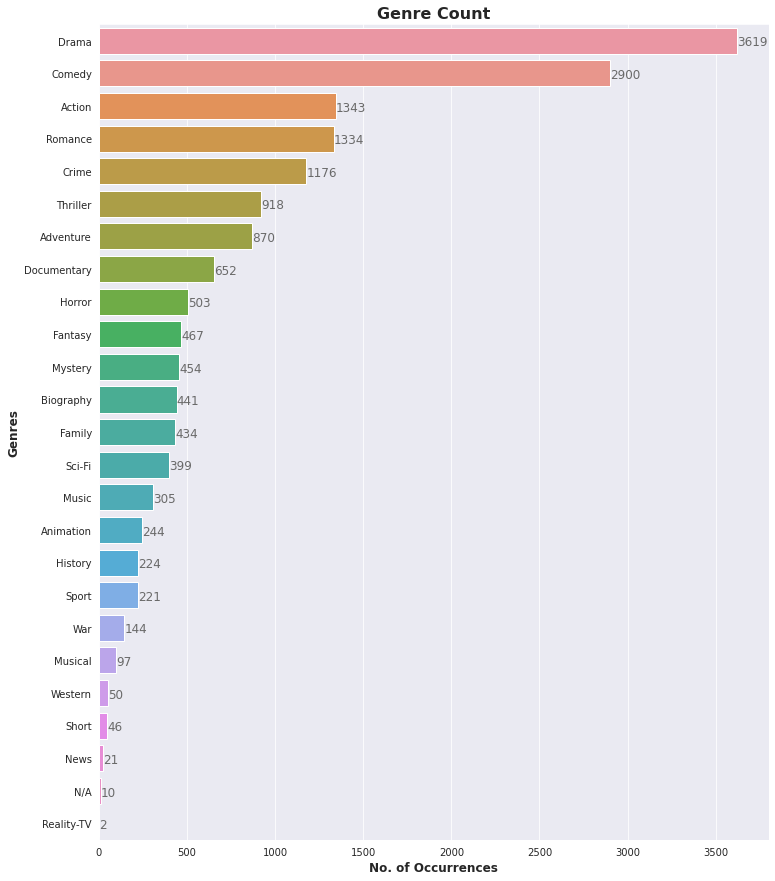

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,15)) 

g = data_count.nlargest(n = 50) 
ax = sns.barplot(g.values, g.index, alpha=1)

plt.title("Genre Count", weight='bold', fontsize=16)
plt.ylabel('Genres', weight='bold', fontsize=12)
plt.xlabel('No. of Occurrences', weight='bold', fontsize=12)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.55, \
            str(round((i.get_width()))), fontsize=12, color='dimgrey')

plt.show()

In [13]:
y= Metadata.drop(['Id','Genre'], axis = 1)
y= y.to_numpy()
y.shape

(7254, 25)

 **Spliting the data into training and testing giving a test_size = 0.30 will keep 30% data for testing and 70% data will be used for training the model. Random_state controls the shuffling applied to the data before applying the split.**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50, test_size=0.30)

In [15]:
x_train[0].shape

(350, 350, 3)

## **Building a CNN Model**

In [32]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(25, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_7 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 86, 86, 32)       

## **Compiling and Fitting the Model**

In [34]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [35]:
GenrePred = model.fit(x_train, y_train, epochs=10, batch_size = 50, validation_data=(x_test, y_test))

Epoch 1/10
102/102 [==============================] - 11s 90ms/step - loss: 0.9699 - binary_accuracy: 0.5340 - val_loss: 2.0946 - val_binary_accuracy: 0.4610
Epoch 2/10
102/102 [==============================] - 9s 88ms/step - loss: 0.5523 - binary_accuracy: 0.7493 - val_loss: 0.4836 - val_binary_accuracy: 0.8241
Epoch 3/10
102/102 [==============================] - 9s 88ms/step - loss: 0.3108 - binary_accuracy: 0.8948 - val_loss: 0.3962 - val_binary_accuracy: 0.9024
Epoch 4/10
102/102 [==============================] - 9s 87ms/step - loss: 0.2721 - binary_accuracy: 0.9051 - val_loss: 0.3977 - val_binary_accuracy: 0.9052
Epoch 5/10
102/102 [==============================] - 9s 88ms/step - loss: 0.2660 - binary_accuracy: 0.9058 - val_loss: 0.4512 - val_binary_accuracy: 0.8583
Epoch 6/10
102/102 [==============================] - 9s 88ms/step - loss: 0.2551 - binary_accuracy: 0.9082 - val_loss: 0.2952 - val_binary_accuracy: 0.9039
Epoch 7/10
102/102 [==============================] - 9s 

# **Visualizing Model Accuracy and Model Loss**

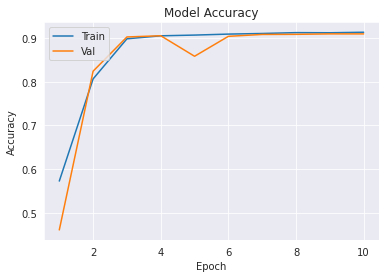

In [36]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['binary_accuracy'])
  plt.plot(epoch_range, GenrePred.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

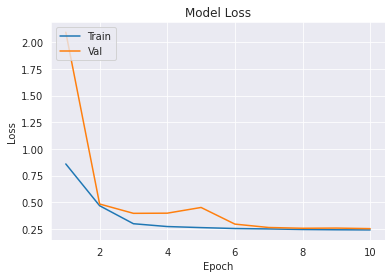

In [37]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation loss values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['loss'])
  plt.plot(epoch_range, GenrePred.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

## **Testing the Model on Some Movie Posters**

Adventure
Action
Animation


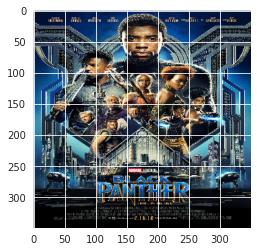

In [38]:
img = image.load_img('black-panther-web.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Adventure
Action


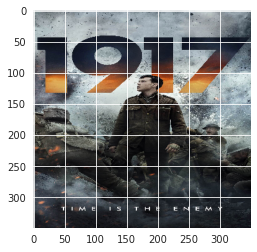

In [39]:
img = image.load_img('1917.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Comedy
Adventure


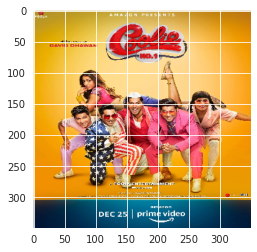

In [40]:
img = image.load_img('Coolie.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Comedy
Adventure


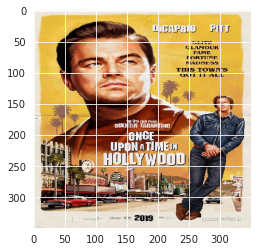

In [41]:
img = image.load_img('Hollywood.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Adventure
Action
Drama


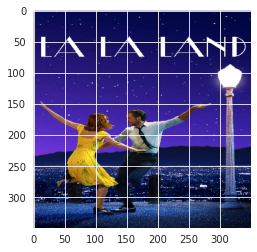

In [42]:
img = image.load_img('Lalaland.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Adventure
Action


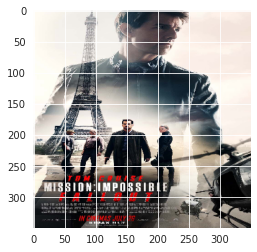

In [43]:
img = image.load_img('MI7.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Adventure
Action
Drama


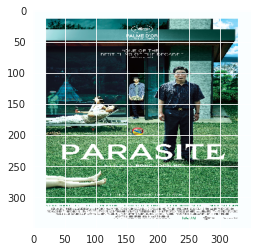

In [44]:
img = image.load_img('Parasite.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Adventure


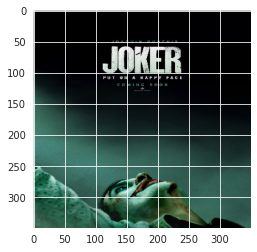

In [45]:
img = image.load_img('joker.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Adventure
Action


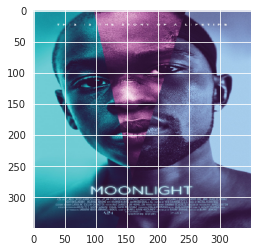

In [46]:
img = image.load_img('moonlight.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Thriller


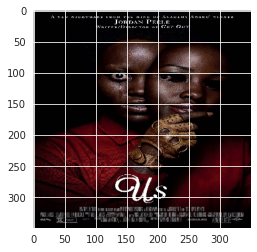

In [47]:
img = image.load_img('us-1.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])